In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import glob
import data_loading
import eval
import partitioning
import impact
import math
from functools import partial
import matplotlib.pyplot as plt

import scipy.stats as st



In [4]:
# load sample lobster data
#message_paths = sorted(glob.glob('/data1/sascha/data/raw/CSCO*message*.csv'))
#book_paths = sorted(glob.glob('/data1/sascha/data/raw/CSCO*orderbook*.csv'))
message_paths = sorted(glob.glob('/data1/sascha/data/data/GOOG/raw/GOOG*message*.csv'))
book_paths = sorted(glob.glob('/data1/sascha/data/data/GOOG/raw/GOOG*orderbook*.csv'))
# message_paths = glob.glob('/homes/80/kang/AlphaTrade/testing_oneDay/data/*message*.csv')
# book_paths = glob.glob('/homes/80/kang/AlphaTrade/testing_oneDay/data/*orderbook*.csv')
print(sorted(message_paths))
print(sorted(book_paths))

len(book_paths)
# 

['/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-03_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-04_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-05_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-06_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-07_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-10_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-11_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-12_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-13_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-14_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-18_34200000_57600000_message_10.csv', '/data1/sascha/data/data/GOOG/raw/GOOG_2022-01-19_34200000_57600

249

In [9]:
m_seqs = [data_loading.load_message_df(path) for path in message_paths]
b_seqs = [data_loading.load_book_df(path) for path in book_paths]

# DATA FORMAT:

# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_cond 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_gen 
# total 156912
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_1_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_1_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_real 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv

In [5]:
mb_seqs=[impact.filter_touch_events(m,b) for m,b in zip(m_seqs,b_seqs)]

In [10]:
res=impact.macro_impact_analyse(3*60,100,32,m_seqs,b_seqs)

Concat Done
Time split & Calc done


Text(0.5, 0, 'P_i')

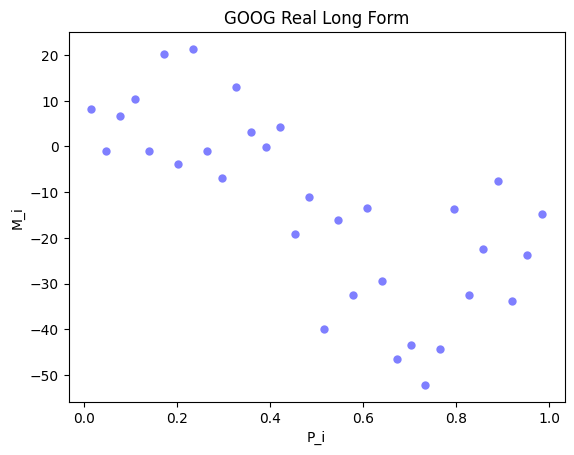

In [12]:
fig = plt.figure()
ax = plt.gca()
ax.plot(res[1][:],res[0][:], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("GOOG Real Long Form")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
#ax.set_ylim([-2,2])
#ax.set_yscale('log')
#ax.set_xscale('log')

In [13]:
res[0][:]

[15.374613003095975,
 -13.787617554858935,
 6.9309153713298794,
 19.697811447811446,
 5.7817589576547235,
 32.77603305785124,
 -11.471544715447154,
 31.342056074766354,
 -13.509041591320072,
 -7.895238095238096,
 11.487279843444227,
 4.079055441478439,
 -3.97741273100616,
 6.631868131868132,
 -30.32800982800983,
 -18.125964010282775,
 -38.3753280839895,
 -11.589887640449438,
 -41.1038338658147,
 -16.49685534591195,
 -8.455516014234876,
 -40.45454545454545,
 -79.64047619047619,
 -52.37671232876713,
 -33.575675675675676,
 -32.08967391304348,
 -27.23701298701299,
 -40.151785714285715,
 -30.48739495798319,
 -28.828358208955223,
 -45.016260162601625,
 -4.800925925925926]

In [62]:
root_path="/data1/sascha/data/sqrt/GOOG/"

loader = data_loading.Simple_Loader(
            real_data_path= root_path+"data_real",
            gen_data_path= root_path+"data_gen",
            cond_data_path=root_path+"data_cond",
)

In [64]:
df=impact.macro_impact_compare(100000,100,32,loader)
df


([-0.08296943231441048,
  0.29411764705882354,
  -0.32954545454545453,
  0.01,
  0.03389830508474576,
  0.2962962962962963,
  -0.5258620689655172,
  -0.5849056603773585,
  -0.1,
  -0.08035714285714286,
  0.3384615384615385,
  -0.40350877192982454,
  -0.65625,
  -0.2672413793103448,
  -0.010869565217391304,
  -0.6619718309859155,
  0.5784313725490197,
  -0.6120689655172413,
  0.06363636363636363,
  -0.07,
  0.031914893617021274,
  0.3191489361702128,
  -1.1097560975609757,
  0.603448275862069,
  -0.21428571428571427,
  -0.19642857142857142,
  0.12962962962962962,
  0.08771929824561403,
  -0.38461538461538464,
  0.16666666666666666,
  -0.33088235294117646,
  0.276036866359447],
 [0.003217272129271781,
  0.04659515106296707,
  0.07964149844981017,
  0.10888090202378978,
  0.1405581454662132,
  0.1722173421513684,
  0.20293387195592116,
  0.23267178976524452,
  0.2669631168099657,
  0.29837095987249324,
  0.3304763448509834,
  0.35938023028741095,
  0.389459460322405,
  0.42369728191307593

In [60]:
ar=np.load('/data1/sascha/comparison_graphINTC_done2.npy',allow_pickle=False)
np.mean(ar/21)

0.1046739686609951

In [15]:
ar=np.load('/data1/sascha/x_vals_GOOG_done2.npy',allow_pickle=False)
print(len(ar))

21


(-1.0, 1.0)

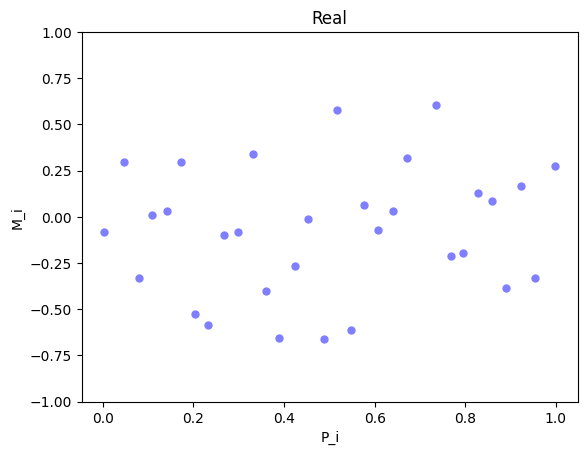

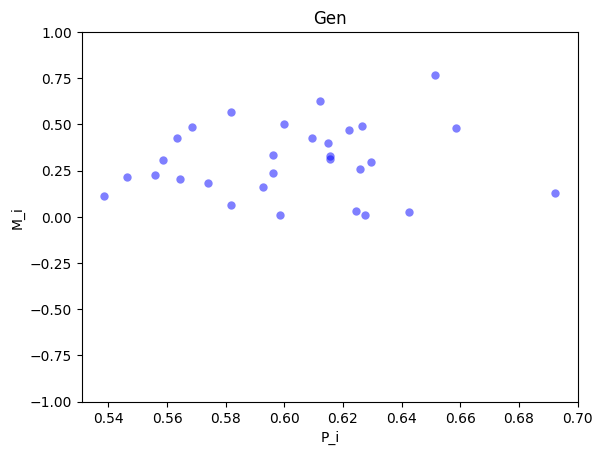

In [69]:
fig = plt.figure()
ax = plt.gca()
ax.plot(df[1][:],df[0][:], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("Real")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
ax.set_ylim([-1,1])
#ax.set_yscale('log')
#ax.set_xscale('log')


fig = plt.figure()
ax = plt.gca()
ax.plot(np.abs(df[3][:]),np.abs(df[2][:]), 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("Gen")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
ax.set_ylim([-1,1])
#ax.set_yscale('log')
#ax.set_xscale('log')




In [7]:
b_seqs[0]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,530000,13,529900,7937,530800,1,529500,1,531000,5,...,526300,300,536700,100,526200,20,538000,2,526000,201
1,530000,3,529900,7937,530800,1,529500,1,531000,5,...,526300,300,536700,100,526200,20,538000,2,526000,201
2,530800,1,529900,7937,531000,5,529500,1,531200,3,...,526300,300,538000,2,526200,20,538900,700,526000,201
3,530800,1,529900,7937,531000,5,529500,101,531200,3,...,526300,300,538000,2,526200,20,538900,700,526000,201
4,530800,1,529900,7937,531000,5,529500,1,531200,3,...,526300,300,538000,2,526200,20,538900,700,526000,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379403,534400,20750,534300,40874,534500,4200,534200,45100,534600,14870,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379404,534400,20750,534300,41374,534500,4200,534200,45100,534600,14870,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379405,534400,20750,534300,40474,534500,4200,534200,45100,534600,14870,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379406,534400,20750,534300,40474,534500,4200,534200,57598,534600,14870,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196


In [105]:
r,g=impact.apply_to_Sequences(impact.response_func,0.95,10,('MO_0',1),loader)
r,g

((0.0, ConfidenceInterval(low=0, high=0)),
 (0.0, ConfidenceInterval(low=0, high=0)))

In [8]:
mb_seqs=[impact.filter_touch_events(m,b) for m,b in zip(m_seqs,b_seqs)]
mb_seqs[0]

,time,event_type,order_id,size,price,direction,0,1,2,3,...,30,31,32,33,34,35,36,37,38,39
0,34200.071086177,1,20584110,7937,529900,1,530000,13,529900,7937,...,526300,300,536700,100,526200,20,538000,2,526000,201
1,34200.071461557,4,17065926,10,530000,-1,530000,3,529900,7937,...,526300,300,536700,100,526200,20,538000,2,526000,201
2,34200.071557986,4,17065926,3,530000,-1,530800,1,529900,7937,...,526300,300,538000,2,526200,20,538900,700,526000,201
9,34200.086371118,1,20594634,3,529900,1,530800,1,529900,7940,...,526300,300,538000,2,526200,20,538900,700,526000,201
11,34200.100864107,1,20601670,3,530800,-1,530800,4,529900,7940,...,526200,20,538000,2,526000,201,538900,700,525200,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379401,57599.941790671,4,506276242,1539,534300,1,534400,20750,534300,41161,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379402,57599.944077062,4,506276242,200,534300,1,534400,20750,534300,40961,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379403,57599.970434748,4,506276242,87,534300,1,534400,20750,534300,40874,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196
379404,57599.978782977,1,506358486,500,534300,1,534400,20750,534300,41374,...,533600,23501,535200,18900,533500,2746,535400,8000,533400,196


In [208]:
impact.impact_compare(loader)

Calculating for event type:  MO_0
Calculating for event type:  MO_1
Calculating for event type:  LO_0
Calculating for event type:  LO_1


KeyboardInterrupt: 

Calculating for event type:  MO_0
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79
Calculating for event type:  MO_1
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79
Calculating for event type:  LO_0
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79
Calculating for event type:  LO_1
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79
Calculating for event type:  CA_0
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79
Calculating for event type:  CA_1
1
1
1
1
2
3
3
5
6
7
10
12
15
19
25
31
39
50
63
79


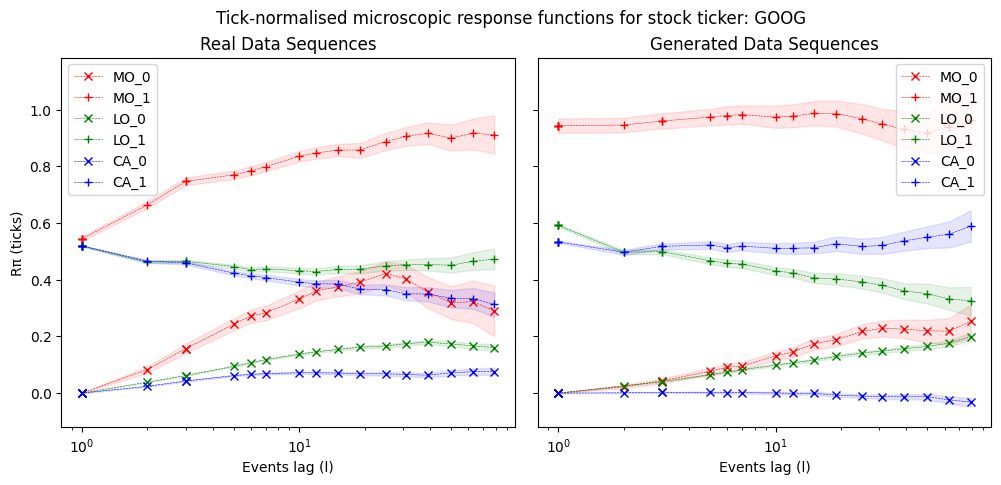

Sum of abs differences for  MO_0  events: 2.3904164746228127
Sum of abs differences for  MO_1  events: 3.6448076485976912
Sum of abs differences for  LO_0  events: 0.43380571352449526
Sum of abs differences for  LO_1  events: 1.1270795562163416
Sum of abs differences for  CA_0  events: 1.109748685279331
Sum of abs differences for  CA_1  events: 2.275502047437252


1.8302266876129873

In [113]:
fun=partial(impact.sign_autocorr,)
x=(10** np.arange(0,4,step=0.1)).astype(int)
y,std_y=zip(*[impact.apply_to_seqs(impact.sign_autocorr,(i,'s'),df_seqs) for i in x])
z,std_z=zip(*[impact.apply_to_seqs(impact.sign_autocorr,(i,'eps'),df_seqs) for i in x])


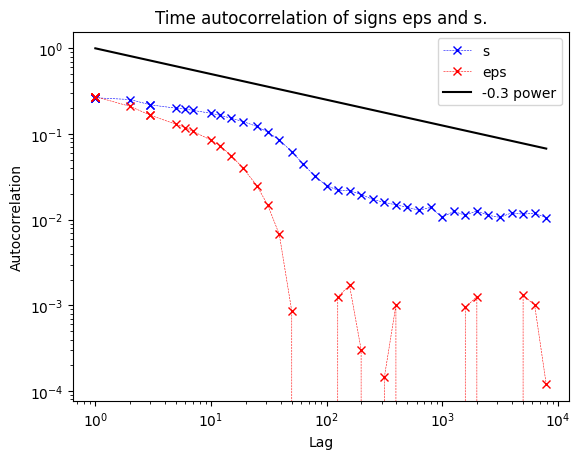

In [114]:
plot_loglog(x,[y,z],None,['s','eps','-0.3 power'],title='Time autocorrelation of signs eps and s.',loglog=0.3,ylabel="Autocorrelation")

In [115]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

ys=[]
stds=[]
events=['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']
for event2 in events:
    mean,std=zip(*[impact.apply_to_seqs(impact.event_cross_corr,('MO_0',event2,i),df_seqs) for i in x])
    ys.append(mean)
    stds.append(np.array(std))



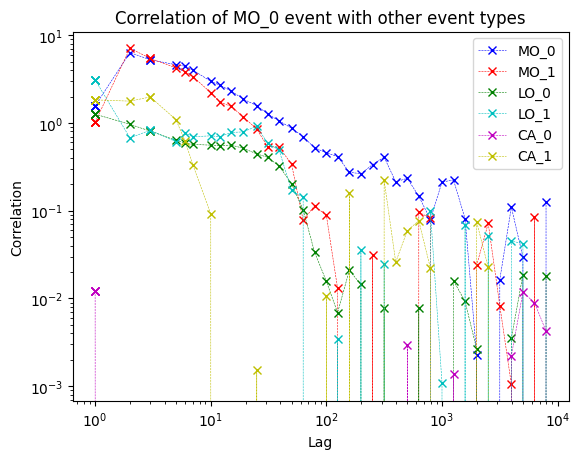

In [116]:
plot_loglog(x,ys,None,legend=events,
            title="Correlation of MO_0 event with other event types",
            ylabel="Correlation")

In [117]:
x=(10** np.arange(0,6,step=0.1)).astype(int)
ys=[]
stds=[]
for event2 in events:
    mean,std=zip(*[impact.apply_to_seqs(impact.event_cross_corr,('MO_1',event2,i),df_seqs) for i in x])
    ys.append(mean)
    stds.append(np.array(std))

/tmp/ipykernel_223308/1476874460.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(np.array(ys_lims)*1.2)


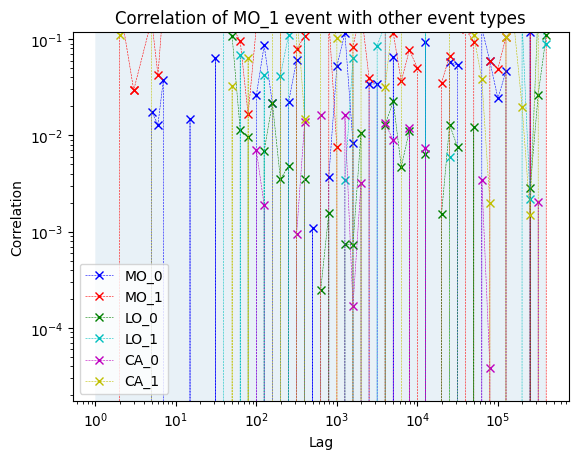

In [118]:

plot_loglog(x,ys,stds,legend=events,
            title="Correlation of MO_1 event with other event types",
            ylabel="Correlation")

In [119]:
x=(10** np.arange(0,4,step=0.1)).astype(int)
ys=[]
for event2 in events:
    ys.append([impact.apply_to_seqs(impact.u_event_corr,('MO_0',event2,i),df_seqs) for i in x])

TypeError: can't multiply sequence by non-int of type 'tuple'

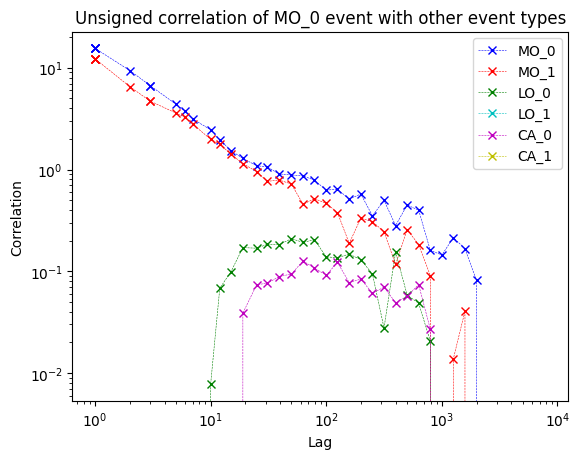

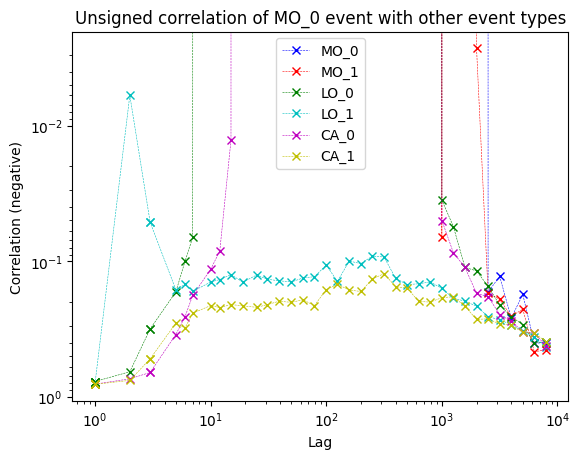

In [ ]:
plot_loglog(x,ys,legend=events,
            title="Unsigned correlation of MO_0 event with other event types",
            ylabel="Correlation")
ys_neg=[([-i for i in y]) for y in ys]
plot_loglog(x,ys_neg,legend=events,
            title="Unsigned correlation of MO_0 event with other event types",
            ylabel="Correlation (negative)",
            invert=True)

In [ ]:
x=(10** np.arange(0,4,step=0.1)).astype(int)
ys=[]
for event2 in events:
    ys.append([impact.apply_to_seqs(impact.u_event_corr,('MO_1',event2,i),df_seqs) for i in x])

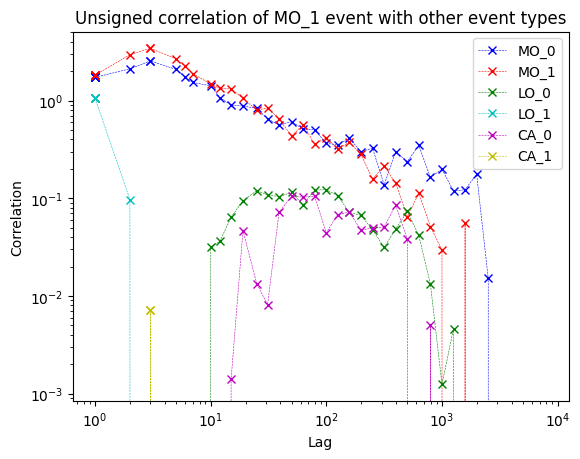

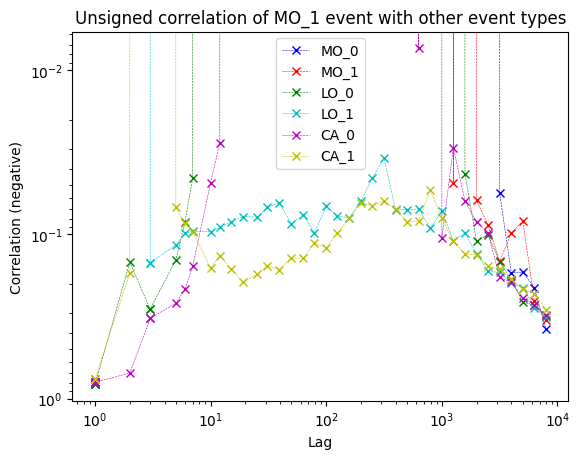

In [ ]:
plot_loglog(x,ys,legend=events,
            title="Unsigned correlation of MO_1 event with other event types",
            ylabel="Correlation")
ys_neg=[([-i for i in y]) for y in ys]
plot_loglog(x,ys_neg,legend=events,
            title="Unsigned correlation of MO_1 event with other event types",
            ylabel="Correlation (negative)",
            invert=True)

In [ ]:
impact_msgs, impact_books=impact.filter_sequence_for_impact(m,b,ordersize=(1100,1300),orderside=1,sequence_length=1000,timestamp=('34200.034289918','34900.134289918'))
print(impact_msgs)

In [ ]:
eval.time_to_first_fill(m).mean()

In [ ]:
eval.time_to_cancel(m).mean()

In [ ]:
eval.l1_volume(m, b)

In [ ]:
eval.total_volume(m, b, 1)

In [ ]:
eval.limit_order_depth(m, b)


In [ ]:
eval.cancellation_depth(m, b)

In [ ]:
eval._order_levels(m, b, (1,2,3))

In [ ]:
eval.cancel_order_levels(m, b)

In [ ]:
eval.spread(b)

In [ ]:
ret = eval.mid_returns(m, b, '1min')
ret

In [ ]:
eval.time_to_first_fill(m)

In [ ]:
eval.autocorr(ret)

In [ ]:
eval.autocorr(ret**2, 10, alpha=None)

In [ ]:
eval.l1_volume(m, b)

In [ ]:
eval.total_volume(m, b, 2)

In [ ]:
eval.limit_order_depth(m_real, b_real)

In [ ]:
# DEPRECATED
# eval.compute_metrics(loader)

In [ ]:
s=loader

In [ ]:
s = loader[0]

In [ ]:
for i in loader:
    print(i)

In [ ]:
ask_lvls, bid_lvls = eval.limit_order_levels(m_real, b_real)

In [ ]:
ask_lvls

In [ ]:
m_real

In [ ]:
b_real

In [ ]:
mid = eval.mid_price(m_real, b_real)
mid

In [ ]:
book_real_3d = eval.compute_3d_book_changes(m_real, b_real)
book_real_3d


# TODO: bin this data for all dimensions separately and then compute the L1 norm of the distributions

In [ ]:
book_real_3d_groups, bins = eval.compute_3d_book_groups(book_real_3d, 5)
book_real_3d_groups


In [ ]:
value_counts = book_real_3d_groups.value_counts()
value_counts

In [ ]:
bins

In [ ]:
# TODO: get the values from value_counts and match them to the right bins
#       also compute the L1 norm of the distributions

In [ ]:
value_counts.sort_index().values.shape

In [ ]:
values.shape

In [ ]:
import matplotlib.pyplot as plt


# X, Y, Z = np.meshgrid([-10,0,10], [-10,0,10], [-10,0,10])
X, Y, Z = np.meshgrid(*bins)
values = 2*X*X - Y*Y + 1/(Z*Z+1)
# values = value_counts.sort_index().values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=values, cmap='viridis', marker='s', alpha=0.5, s=200)
fig.colorbar(scatter, ax=ax)

plt.show()

In [ ]:
# compute 3d book tuples for all real data samples
book_real_3d = pd.concat(partitioning.score_real(loader, eval.compute_3d_book_changes))
book_real_3d.dropna().hist()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(book_real_3d['mid_change'], book_real_3d['price'], book_real_3d['size'])

ax.set_xlabel('Mid Change')
ax.set_ylabel('Price')
ax.set_zlabel('Size')

plt.show()

In [ ]:
eval.mid_returns(m_real, b_real)

In [ ]:
m_real.iloc[1163]

In [ ]:
b_real.iloc[1163]

In [ ]:
eval.autocorr(eval.mid_returns(m_real, b_real, '1min'), 4)
# eval.mid_returns(m_real, b_real, '5min')

In [ ]:
eval._order_levels(m_real, b_real, (2,3))

In [ ]:
cnl_lvl_ask, cnl_lvl_bid = eval.cancel_order_levels(m_real, b_real)

In [ ]:
eval.mean_per_interval(cnl_lvl_ask, "5min")

## Library Use Cases

In [ ]:
from data_loading import Simple_Loader, Lobster_Sequence, Lazy_Tuple

In [ ]:
# loader = data_loading.Simple_Loader('data_test_real', 'data_test_gen', 'data_test_cond')
loader = data_loading.Simple_Loader('data_saved/GOOG/data_real', 'data_saved/GOOG/data_gen', 'data_saved/GOOG/data_cond')
s = loader[0]
# s.materialize()

In [ ]:
s.m_real

In [ ]:
partitioning.score_real(loader, lambda x, y: 1)

In [ ]:
scores = partitioning.score_real(
    tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader),
    lambda m, b: m.time.diff().mean()
)
scores

In [ ]:
scores = partitioning.score_cond(
    loader, 
    lambda m, b: m.time.diff().mean()
)

In [ ]:
scores

In [ ]:
subseq = partitioning.get_subseqs(s, subseq_len=1000)
len(subseq.m_real)

In [ ]:
s.m_gen[0]

In [ ]:
subseq = partitioning.get_subseqs(loader[0], time_interval='5min')

In [ ]:
# Example of how grouping works

partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6],
    n_bins=4
)

In [ ]:
# ..using subsequences

partitioning.group_by_score(
    scores_real=[[9, 10], [9.5, 9], [8, 11, 5.5]],
    scores_gen=[[[8, 10, 9.5], [9, 8, 11]], [[5.5, 1, 1], [1, 2, 3, 6]]],
    quantiles=[0.2, 0.5, 0.8]
)

In [ ]:
loader

In [ ]:
import metrics
import plotting

In [ ]:
# unconditional comparison of distributions (of 10 min intervals)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# compare distributions of scores
metrics.wasserstein(scores_real, scores_gen)

# print(scores_real)
# print(scores_gen)

In [ ]:
plotting.hist(scores_real, scores_gen)

In [ ]:
groups[0]

In [ ]:
# comparison conditional on time of day (which subsequence part)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# enumerate groups for each subseq for each real and gen. sequence
groups_real, groups_gen = partitioning.group_by_subseq(subseqs)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

score_df

In [ ]:
# print entire score table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(score_df)

In [ ]:
group_counts = score_df.groupby(['type', 'group']).count()
group_counts = pd.merge(group_counts.loc['real'], group_counts.loc['generated'], on='group')
(group_counts.score_x - group_counts.score_y).abs().mean()

In [ ]:
def l1_by_group(score_df: pd.DataFrame) -> float:
    """
    Takes a "score dataframe" with columns score (real numbers), group (+int), type ("real" or "generated")
    Returns the mean L1 distance between the number of scores in each group for the real and generated data.
    """
    group_counts = score_df.groupby(['type', 'group']).count()
    group_counts = pd.merge(group_counts.loc['real'], group_counts.loc['generated'], on='group')
    return (group_counts.score_x - group_counts.score_y).abs().mean()
l1_by_group(score_df)

In [ ]:
l1_by_group(score_df)

In [ ]:
score_df.type.unique()

In [ ]:
plotting.line(score_df, '', 'time interval', 'spread')

In [ ]:
b_real=loader[0].b_real
m_real=loader[0].m_real
columns = [item for i in range(1,11) for item in (f"askPrice{i}", f"askQuant{i}", f"bidPrice{i}", f"bidQuant{i}")]
b_real.columns=columns
b_real['mid_price']=(b_real['askPrice1']*b_real['askQuant1']+b_real['bidPrice1']*b_real['bidQuant1'])/(b_real['askQuant1']+b_real['bidQuant1'])
b_real['delta_mid_price']=b_real['mid_price'].diff().fillna(0)
b_real

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
idx = 2
delta_mid_price = b_real.iloc[idx,-1]
lb_array=b_real.iloc[idx-1,:40].values.reshape(20,2)
b_array=b_real.iloc[idx,:40].values.reshape(20,2)
lb_unique = np.array([x for x in lb_array if not any(np.array_equal(x, y) for y in b_array)])
b_unique = np.array([x for x in b_array if not any(np.array_equal(x, y) for y in lb_array)])
first_lb_unique=lb_unique[0];first_b_unique=b_unique[0]
index = np.where(b_array[:, 0] == first_b_unique[0])[0][0]
quant = np.where(first_b_unique[0] == first_lb_unique[0], first_b_unique[1] - first_lb_unique[1], first_b_unique[1])
result = np.array([delta_mid_price,index,quant])

In [ ]:
b_real['delta_mid_price'].plot()

In [ ]:
def ob3Drepr(orderbook, row_index):
    price_level = 10
    delta_mid_price = b_real.iloc[row_index,-1]
    lb_array=b_real.iloc[row_index-1,:4*price_level].values.reshape(2*price_level,2)
    b_array=b_real.iloc[row_index,:4*price_level].values.reshape(2*price_level,2)
    lb_unique = np.array([x for x in lb_array if not any(np.array_equal(x, y) for y in b_array)])
    b_unique = np.array([x for x in b_array if not any(np.array_equal(x, y) for y in lb_array)])
    first_lb_unique=lb_unique[0];first_b_unique=b_unique[0]
    index = np.where(b_array[:, 0] == first_b_unique[0])[0][0]
    quant = np.where(first_b_unique[0] == first_lb_unique[0], first_b_unique[1] - first_lb_unique[1], first_b_unique[1])
    result = np.array([delta_mid_price,index,quant])

In [ ]:
# calculate scores of entire real and generated data (here by the spread),
# and group each subsequence into a bin based on the score
# for each of these bins, calculate the distribution of a statistic of interest (e.g. autocorrelation of mid returns)

scoring_fn = lambda m, b: eval.spread(m, b).mean()
scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)
groups_real, groups_gen = partitioning.group_by_score(
    scores_real, scores_gen,
    # n_bins=5,
    quantiles=[0.25, 0.5, 0.75],
)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

eval_fn = lambda m, b: eval.autocorr(eval.mid_returns(m, b, interval='1min'), 1)[1]
eval_real, eval_gen = partitioning.score_real_gen(subseqs, eval_fn)
eval_df = partitioning.get_score_table(eval_real, eval_gen, groups_real, groups_gen)

eval_df

In [ ]:
# 1-minute return autocorrelation by spread quartile
eval_df.groupby(['type', 'group']).score.mean()

In [ ]:
# split data into subsequences (10min each),
# calculate scores of real and generated data (here by the spread),
# and group each subsequence into a bin based on the score

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

partitioning.group_by_score(
    scores_real, scores_gen,
    n_bins=5
)

In [ ]:
partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[(8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6)],
    n_bins=5
)

In [ ]:
# example use of scoring for real data
print(
    partitioning.score_real(loader, lambda m, b: eval.spread(m, b).mean())
)
# example use of scoring for generated data
print(
    partitioning.score_gen(loader, lambda m, b: eval.spread(m, b).mean())
)

In [ ]:
# TOOD: use partitioning.group_by_score to get groups and then compare relevant metrics for each group
#      solve this for conditioning on cond. data

In [ ]:
# condition only on input data
scores = partitioning.score_cond(
    loader,
    lambda m, b: eval.spread(m, b).mean()
)
print(scores)

# --> only single groups (combined scores using input sequences) relevant here
groups, _ = partitioning.group_by_score(
    scores,
    n_bins=5
)
groups

In [ ]:
loader[0].m_real

In [ ]:
scores

In [ ]:
# TODO: compare relevant metrics for each group (can we compute all metrics in one go? and then do different groupings and comparisons?)
#       think about more principled dim. reduction functions for this

#       implement some distance metrics to compare distributions of metrics for different groups (wasserstein, KL, etc.)

#       TRAIN LARGE MODEL AND RUN INFERENCE

#       implement some market impact metrics (e.g. price impact of trades, etc.) --> how should we structure the data for this?
#           --> e.g. market impact flag if cond. input has artificial orders?
#           - define function to generate input sequences with artificial orders
#           - function to find sequences with naturally occuring taking orders etc? 

## KL Divergence

In [ ]:
import numpy as np
import scipy.stats
from sklearn.neighbors import KernelDensity
# Example usage
N = 1011
M = 1234
# M = 211
K = 1
a = np.random.rand(N, K)
b = np.random.rand(M, K)


In [ ]:
import warnings
import numpy as np
import scipy, time
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats, integrate

warnings.filterwarnings("ignore")

In [ ]:



def KLD_PerezCruz(P, Q, eps=1e-11):
    '''takes two datasets to estimate the relative entropy between their PDFs
    we use eps=10^-11, but it could be defined as < the minimal interval between data points'''
    def cumcount_reduced(arr):
        '''Returns the step function value at each increment of the CDF'''
        sorted_arr = np.array(sorted(arr))
        counts = np.zeros(len(arr))
        
        rolling_count = 0
        for idx, elem in enumerate(sorted_arr):
            rolling_count += 1
            counts[idx] = rolling_count

        counts /= len(counts)
        counts -= (1 / (2 * len(counts)))

        return (sorted_arr, counts)
    P = sorted(P)
    Q = sorted(Q)
    
    P_positions, P_counts = cumcount_reduced(P)
    Q_positions, Q_counts = cumcount_reduced(Q)
    
    #definition of x_0 and x_{n+1}
    x_0 = np.min([P_positions[0], Q_positions[0]]) - 1
    P_positions = np.insert(P_positions, 0, [x_0])
    P_counts = np.insert(P_counts, 0, [0])
    Q_positions = np.insert(Q_positions, 0, [x_0])
    Q_counts = np.insert(Q_counts, 0, [0])
    
    x_np1 = np.max([P_positions[-1], Q_positions[-1]]) + 1
    P_positions = np.append(P_positions, [x_np1])
    P_counts = np.append(P_counts, [1])
    Q_positions = np.append(Q_positions, [x_np1])
    Q_counts = np.append(Q_counts, [1])
    
    f_P = interp1d(P_positions, P_counts)
    f_Q = interp1d(Q_positions, Q_counts) 
    
    X = P_positions[1:-2]
    values = (f_P(X) - f_P(X - eps)) / (f_Q(X) - f_Q(X - eps))
    filt = ((values != 0.) & ~(np.isinf(values)) & ~(np.isnan(values)))
    values_filter = values[filt]
    out = (np.sum(np.log(values_filter)) / len(values_filter)) - 1.

    return out
KLD_PerezCruz(a, b)

In [ ]:
import numpy as np
from scipy.spatial import KDTree

def kl(X, Y):
    """
    Estimate the Kullback-Leibler divergence between two multivariate samples.
    Adapted for Python from R code at https://gist.github.com/atabakd/ed0f7581f8510c8587bc2f41a094b518
    as described in Fernando Pérez-cruz, Kullback-Leibler Divergence Estimation of Continuous Distributions,
    Proceedings of IEEE International Symposium on Information Theory, 2008, 1666--1670

    Parameters
    ----------
    X : 2D array (n,d)
        Samples from distribution P, which typically represents the true distribution.
    Y : 2D array (m,d)
        Samples from distribution Q, which typically represents the approximate distribution.

    Returns
    -------
    out : float
        The estimated Kullback-Leibler divergence D(P||Q).
    """
import numpy as np
from scipy.spatial import KDTree

def kl(X, Y):
    """
    Estimate the Kullback-Leibler divergence between two multivariate samples.
    Adapted for Python from R code at https://gist.github.com/atabakd/ed0f7581f8510c8587bc2f41a094b518
    as described in Fernando Pérez-cruz, Kullback-Leibler Divergence Estimation of Continuous Distributions,
    Proceedings of IEEE International Symposium on Information Theory, 2008, 1666--1670

    Parameters
    ----------
    X : 2D array (n,d)
        Samples from distribution P, which typically represents the true distribution.
    Y : 2D array (m,d)
        Samples from distribution Q, which typically represents the approximate distribution.

    Returns
    -------
    out : float
        The estimated Kullback-Leibler divergence D(P||Q).
    """
    # get important dimensions
    d = X.shape[1]  # number of dimensions, must be the same in X and Y
    n = X.shape[0]  # number of samples in X
    m = Y.shape[0]  # number of samples in Y
    
    # get distances to nearest neighbors using KDTree
    tree_X = KDTree(X)
    tree_Y = KDTree(Y)
    
    r = tree_X.query(X, k=2, eps=0.01)[0][:, 1]  # get 2 closest neighbors, then take the second (the closest is the point itself) to get n x 1 array
    s = tree_Y.query(X, k=1, eps=0.01)[0]  # also n x 1 array
    
    # Add a small value to avoid log of zero
    epsilon = 1e-10
    r = r + epsilon
    s = s + epsilon
    
    # Correct implementation of KL divergence formula
    term1 = np.sum(np.log(s / r)) * d / n
    term2 = np.log(m / (n - 1.))
    
    # Ensure the term1 calculation aligns with the KL divergence definition
    kl_divergence = (term1 + term2) * n / m  # Adjust based on the definition in the referenced paper
    
    return kl_divergence
kl(a, b)

In [ ]:


def kl_divergence(a, b):
    """
    Calculate the Kullback-Leibler (KL) divergence between the KDEs of two datasets.

    Args:
        a (np.ndarray): First dataset of shape (N, K), where N is the number of samples and K is the number of features.
        b (np.ndarray): Second dataset of shape (M, K), where M is the number of samples and K is the number of features.

    Returns:
        float: The KL divergence between the two datasets.
    """
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]    

    # Fit KDE models
    kde_a = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(a)
    kde_b = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(b)

    # Generate evaluation points based on the average number of samples
    num_points = int(np.mean([N, M]) * 10)
    # x = np.linspace(0, 1, 1000)
    x = np.linspace(0, 1, num_points)

    # Generate a grid of K-dimensional points for PDF evaluation
    grid = np.array(np.meshgrid(*([x] * K))).T.reshape(-1, K)
    

    log_pdf_a = kde_a.score_samples(grid)
    log_pdf_b = kde_b.score_samples(grid)

    pdf_a = np.exp(log_pdf_a)
    pdf_b = np.exp(log_pdf_b)

    # Add a small value to PDFs to avoid log(0)
    epsilon = 1e-10
    pdf_a += epsilon
    pdf_b += epsilon

    # Normalize PDFs
    pdf_a /= np.sum(pdf_a)
    pdf_b /= np.sum(pdf_b)

    # Calculate KL divergence
    kl_div = scipy.stats.entropy(pdf_a, pdf_b)

    # print("KL Divergence:", kl_div)
    return kl_div
kl_divergence(a, b)


In [ ]:
import numpy as np
import math
import scipy.stats
from sklearn.neighbors import NearestNeighbors

def k_nearest_neighbors_density_estimation(X, k):
    """
    Estimate density using k-nearest neighbors.
    
    Args:
        X (np.ndarray): Data points of shape (N, K).
        k (int): Number of nearest neighbors to use.
    
    Returns:
        densities (np.ndarray): Density estimates of shape (N,).
    """
    N, K = X.shape
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    radius = distances[:, -1]  # Distance to the k-th nearest neighbor
    volume = np.pi**(K / 2) / math.gamma(K / 2 + 1) * radius**K
    densities = k / (N * volume)
    return densities

def kl_divergence_knn(a, b, k=50):
    """
    Estimate the Kullback-Leibler (KL) divergence between two datasets using k-nearest neighbors.
    
    Args:
        a (np.ndarray): First dataset of shape (N, K).
        b (np.ndarray): Second dataset of shape (M, K).
        k (int): Number of nearest neighbors to use. Default is 50.
    
    Returns:
        float: The average KL divergence between the two datasets.
    """
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]

    # Determine number of samples and iterations based on dataset sizes and dimensionality
    num_samples = 100 * np.mean([N, M])
    num_iterations = 100 * K
    
    kl_divergences = []
    
    for _ in range(num_iterations):
        # Select min(N, M, num_samples) samples from both datasets
        sample_size = min(N, M, num_samples)
        indices_a = np.random.choice(N, sample_size, replace=False)
        indices_b = np.random.choice(M, sample_size, replace=False)
        
        a_sample = a[indices_a]
        b_sample = b[indices_b]

        # Estimate densities
        p_hat_a = k_nearest_neighbors_density_estimation(a_sample, k)
        q_hat_b = k_nearest_neighbors_density_estimation(b_sample, k)
        
        # Compute KL divergence
        kl_div = (K / sample_size) * np.sum(np.log(p_hat_a / q_hat_b)) + np.log(M / (N - 1))
        kl_divergences.append(kl_div)
    
    # Average KL divergence over all iterations
    avg_kl_div = np.mean(kl_divergences)
    
    return avg_kl_div

kl_div = kl_divergence_knn(a, b, k=100)
print("Average KL Divergence:", kl_div)


In [ ]:
import numpy as np
import math
import scipy.stats
from sklearn.neighbors import NearestNeighbors, KernelDensity
import pandas as pd

def k_nearest_neighbors_density_estimation(X, k):
    N, K = X.shape
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    radius = distances[:, -1]  # Distance to the k-th nearest neighbor
    volume = np.pi**(K / 2) / math.gamma(K / 2 + 1) * radius**K
    densities = k / (N * volume)
    return densities

def kl_divergence_knn(a, b, k=50):
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]

    num_samples = int(np.mean([N, M]) * 10)
    num_iterations = 100 * K
    
    kl_divergences = []
    
    for _ in range(num_iterations):
        sample_size = min(N, M, num_samples)
        indices_a = np.random.choice(N, sample_size, replace=False)
        indices_b = np.random.choice(M, sample_size, replace=False)
        
        a_sample = a[indices_a]
        b_sample = b[indices_b]

        p_hat_a = k_nearest_neighbors_density_estimation(a_sample, k)
        q_hat_b = k_nearest_neighbors_density_estimation(b_sample, k)
        
        kl_div = (K / sample_size) * np.sum(np.log(p_hat_a / q_hat_b)) + np.log(M / (N - 1))
        kl_divergences.append(kl_div)
    
    avg_kl_div = np.mean(kl_divergences)
    
    return avg_kl_div

def kl_divergence_kde(a, b, bandwidth=0.1):
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]    

    kde_a = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(a)
    kde_b = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(b)

    num_points = int(np.mean([N, M]) * 10)
    x = np.linspace(0, 1, num_points)

    grid = np.array(np.meshgrid(*([x] * K))).T.reshape(-1, K)
    
    log_pdf_a = kde_a.score_samples(grid)
    log_pdf_b = kde_b.score_samples(grid)

    pdf_a = np.exp(log_pdf_a)
    pdf_b = np.exp(log_pdf_b)

    epsilon = 1e-10
    pdf_a += epsilon
    pdf_b += epsilon

    pdf_a /= np.sum(pdf_a)
    pdf_b /= np.sum(pdf_b)

    kl_div = scipy.stats.entropy(pdf_a, pdf_b)

    return kl_div

# Example usage
N = 101
M = 211
K = 1
a = np.random.rand(N, K)
b = np.random.rand(M, K)

kl_div_knn = kl_divergence_knn(a, b, k=100)
kl_div_kde = kl_divergence_kde(a, b, bandwidth=0.1)

results = {
    "KL Divergence using k-NN": kl_div_knn,
    "KL Divergence using KDE": kl_div_kde
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=["KL Divergence"])
results_df
